In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM


mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_train[0].shape)

model = Sequential()

# IF you are running with a GPU, try out the CuDNNLSTM layer type instead (don't pass an activation, tanh is required)
model.add(CuDNNLSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))

model.add(CuDNNLSTM(128))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(x_train,
          y_train,
          epochs=3,
          validation_data=(x_test, y_test))

(60000, 28, 28)
(28, 28)
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 38s 636us/sample - loss: 0.3770 - acc: 0.8856 - val_loss: 0.1024 - val_acc: 0.9694
Epoch 2/3
60000/60000 [==============================] - 38s 631us/sample - loss: 0.1219 - acc: 0.9674 - val_loss: 0.0743 - val_acc: 0.9790
Epoch 3/3
60000/60000 [==============================] - 38s 628us/sample - loss: 0.0870 - acc: 0.9771 - val_loss: 0.0700 - val_acc: 0.9806


In [0]:
prediction = model.predict([x_test])

In [14]:
import numpy as np
np.argmax(prediction[30])


3

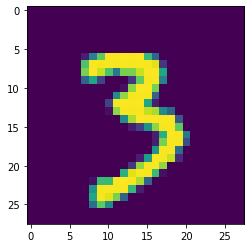

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_test[30])
plt.show()